# <center>**Insper**</center>

## Data Science

### Murilo Cechin 

Gráficos

#### **Exemplo do Matplotlib:**

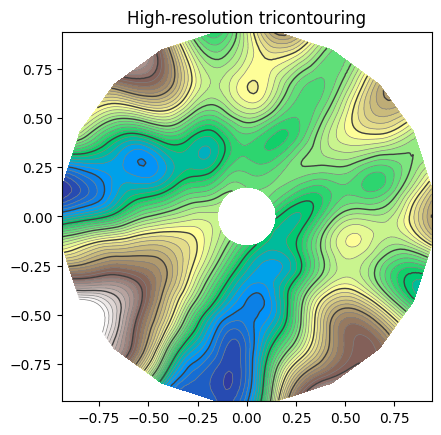

In [1]:
import matplotlib.tri as tri
import matplotlib.pyplot as plt
import numpy as np


# ----------------------------------------------------------------------------
# Analytical test function
# ----------------------------------------------------------------------------
def function_z(x, y):
    r1 = np.sqrt((0.5 - x)**2 + (0.5 - y)**2)
    theta1 = np.arctan2(0.5 - x, 0.5 - y)
    r2 = np.sqrt((-x - 0.2)**2 + (-y - 0.2)**2)
    theta2 = np.arctan2(-x - 0.2, -y - 0.2)
    z = -(2 * (np.exp((r1 / 10)**2) - 1) * 30. * np.cos(7. * theta1) +
          (np.exp((r2 / 10)**2) - 1) * 30. * np.cos(11. * theta2) +
          0.7 * (x**2 + y**2))
    return (np.max(z) - z) / (np.max(z) - np.min(z))

# ----------------------------------------------------------------------------
# Creating a Triangulation
# ----------------------------------------------------------------------------
# First create the x and y coordinates of the points.
n_angles = 20
n_radii = 10
min_radius = 0.15
radii = np.linspace(min_radius, 0.95, n_radii)

angles = np.linspace(0, 2 * np.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += np.pi / n_angles

x = (radii * np.cos(angles)).flatten()
y = (radii * np.sin(angles)).flatten()
z = function_z(x, y)

# Now create the Triangulation.
# (Creating a Triangulation without specifying the triangles results in the
# Delaunay triangulation of the points.)
triang = tri.Triangulation(x, y)

# Mask off unwanted triangles.
triang.set_mask(np.hypot(x[triang.triangles].mean(axis=1),
                         y[triang.triangles].mean(axis=1))
                < min_radius)

# ----------------------------------------------------------------------------
# Refine data
# ----------------------------------------------------------------------------
refiner = tri.UniformTriRefiner(triang)
tri_refi, z_test_refi = refiner.refine_field(z, subdiv=3)

# ----------------------------------------------------------------------------
# Plot the triangulation and the high-res iso-contours
# ----------------------------------------------------------------------------
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.triplot(triang, lw=0.5, color='white')

levels = np.arange(0., 1., 0.025)
ax.tricontourf(tri_refi, z_test_refi, levels=levels, cmap='terrain')
ax.tricontour(tri_refi, z_test_refi, levels=levels,
              colors=['0.25', '0.5', '0.5', '0.5', '0.5'],
              linewidths=[1.0, 0.5, 0.5, 0.5, 0.5])

ax.set_title("High-resolution tricontouring")

plt.show()

#### **Exemplo Seaborn:**

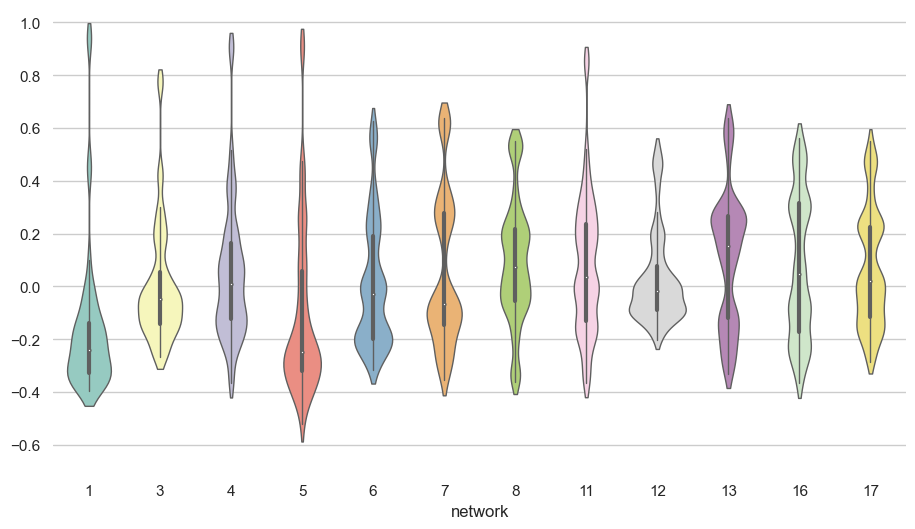

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Load the example dataset of brain network correlations
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Pull out a specific subset of networks
used_networks = [1, 3, 4, 5, 6, 7, 8, 11, 12, 13, 16, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Compute the correlation matrix and average over networks
corr_df = df.corr().groupby(level="network").mean()
corr_df.index = corr_df.index.astype(int)
corr_df = corr_df.sort_index().T

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))

# Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=corr_df, palette="Set3", bw=.2, cut=1, linewidth=1)

# Finalize the figure
ax.set(ylim=(-.7, 1.05))
sns.despine(left=True, bottom=True)